# Assignment


In [7]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns 

%matplotlib inline

In [8]:
df = pd.read_csv('BostonHousing - BostonHousing.csv')

In [9]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# About the dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

# Question 
As always, we start off with EDA.

- Give me some insights, the better they are, the better your grade looks !!
- Then we move on to the modelling part

Using all of these variables, try to fit/train a linear regression model that predicts the price of the house. 

The ```MEDV``` is the price columns, it is in 1000's of $.

At the end, these are the things i am looking for:-
- Your model train and test RSME
- A python function that takes these values(training row for eg.) as input and predicts a price. 


That's all 

![](https://media.tenor.com/HyDkalWyz7YAAAAd/all-the-best-best-of-luck.gif)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.shape

(506, 14)

In [14]:
df.isnull().sum()/len(df) * 100

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

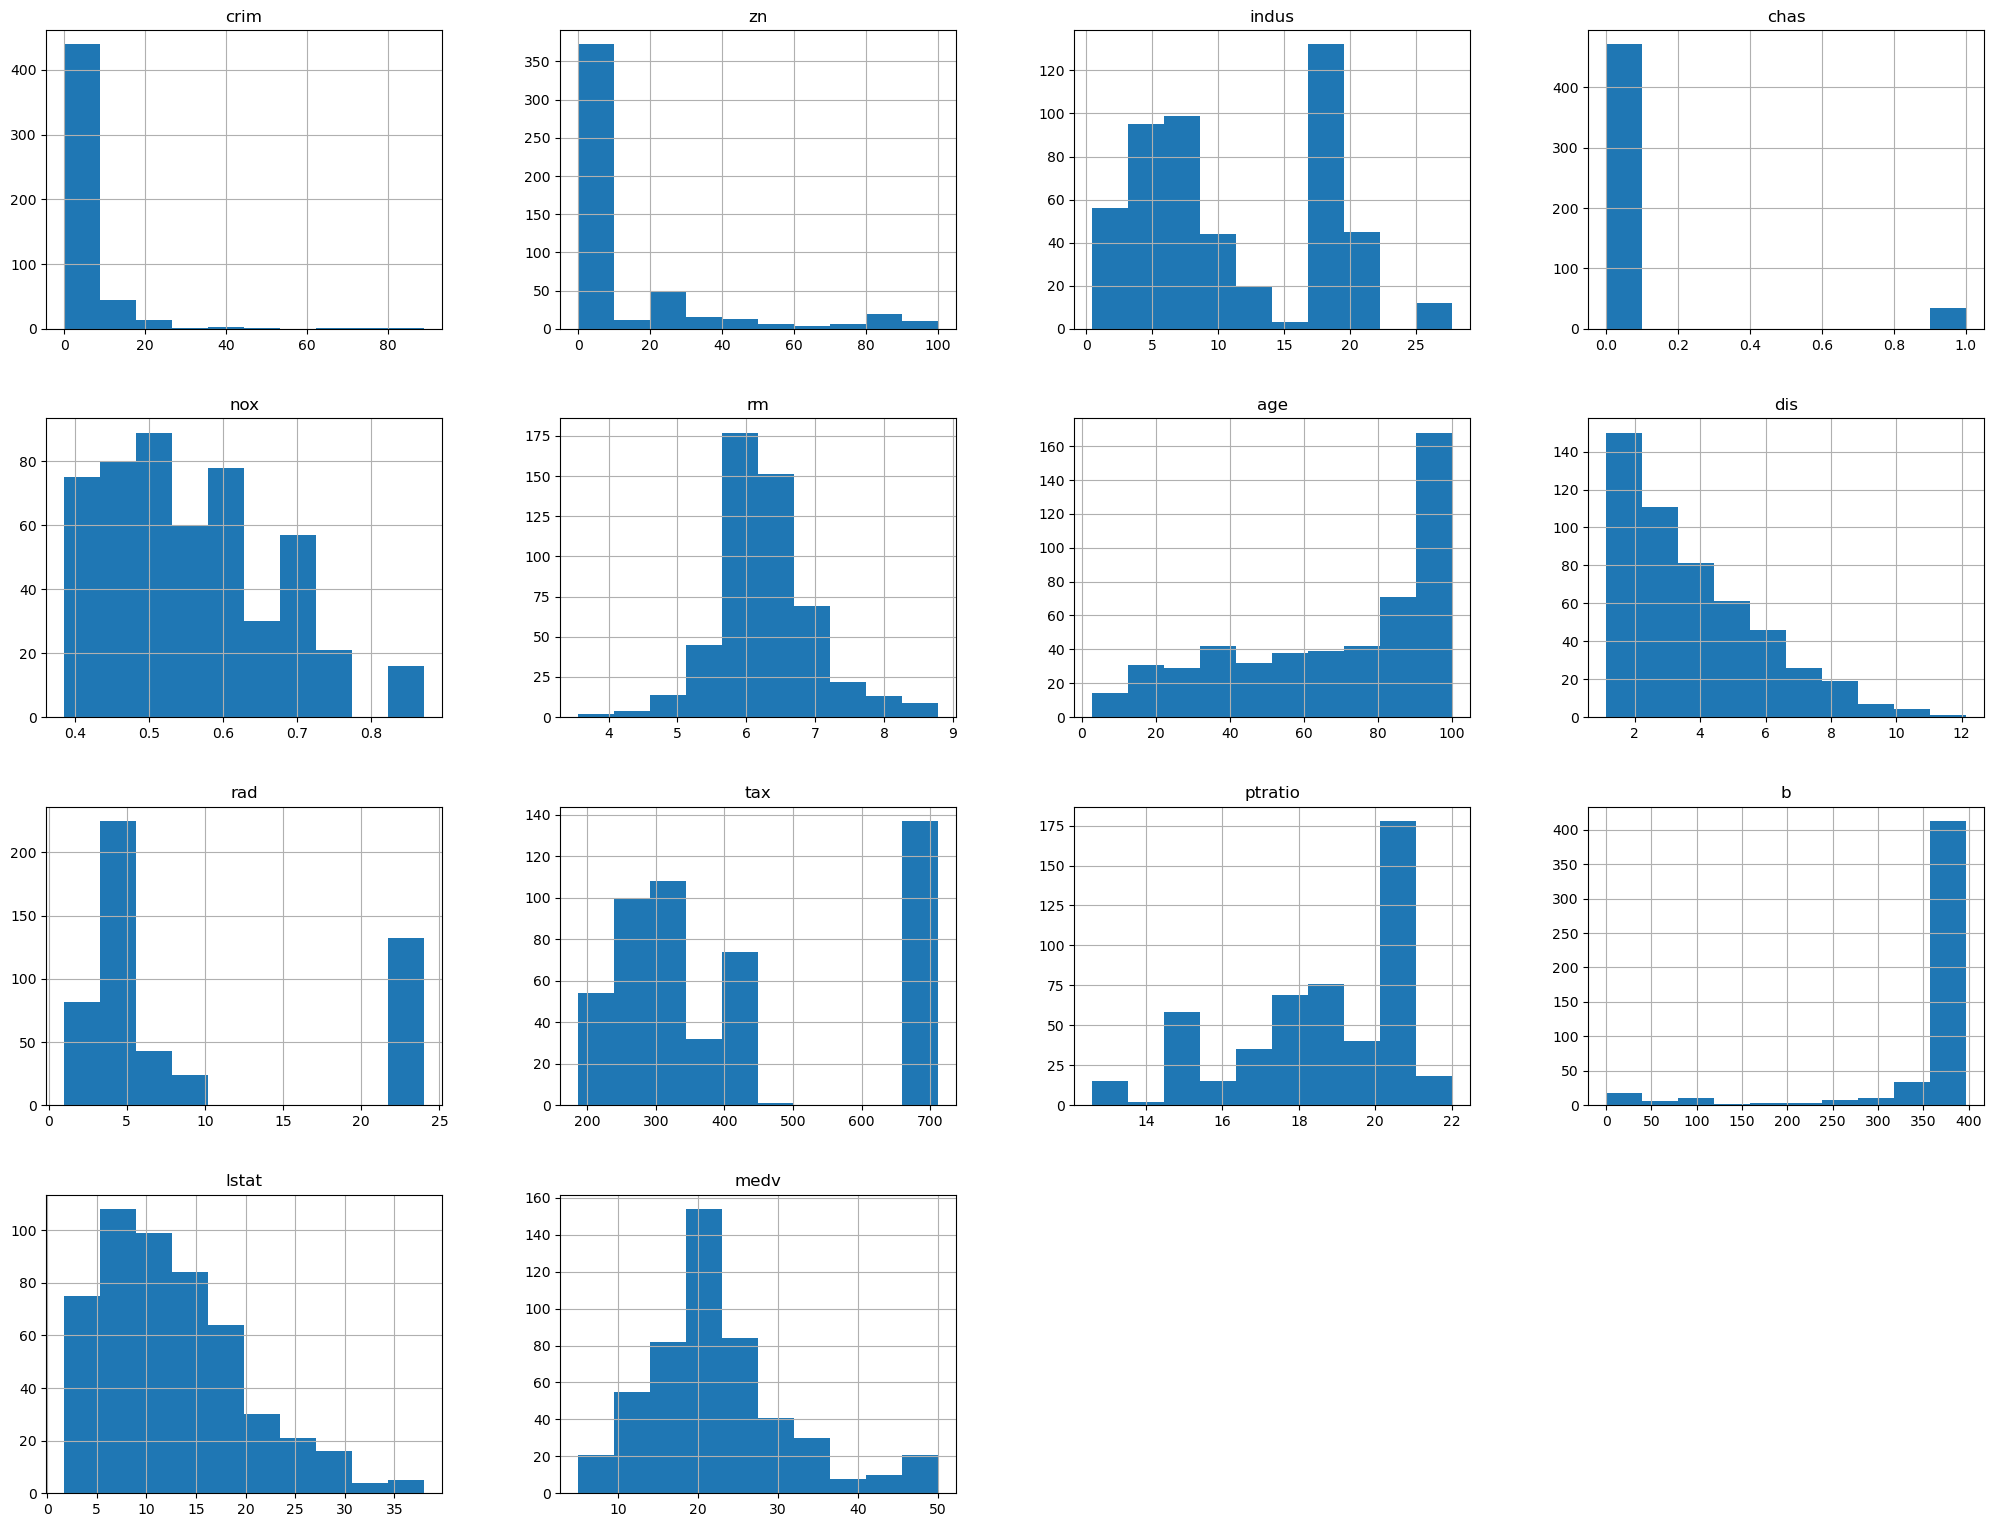

In [15]:
df.hist(figsize=(25,19))
plt.show()

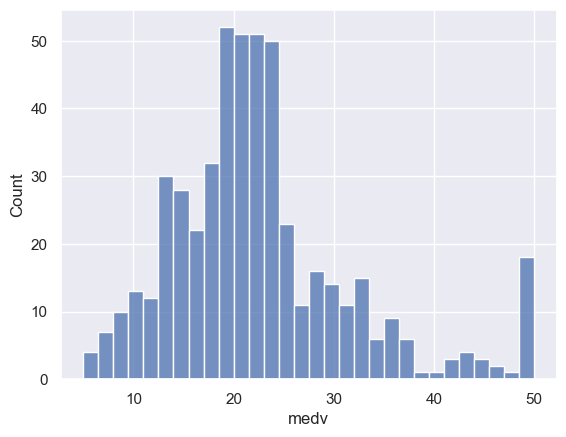

In [16]:
sns.set()
sns.histplot(df['medv'], bins=30)
plt.show()

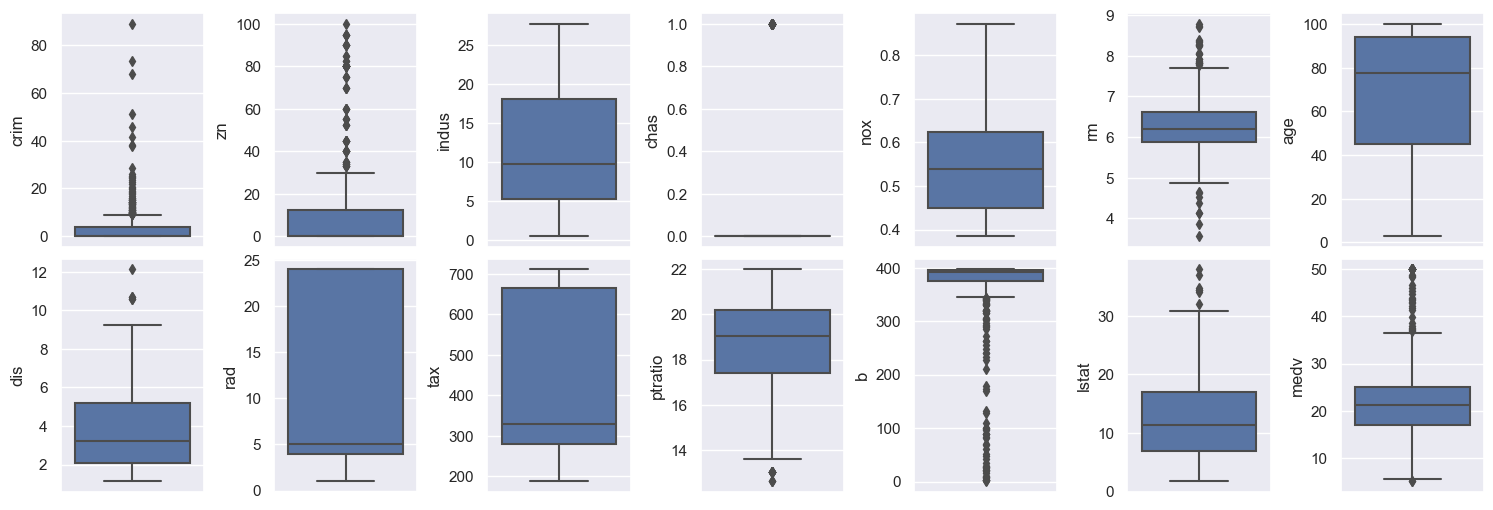

In [17]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
  sns.boxplot(y=i, data=df, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

# distribution of each feature in a dataset using box plots.

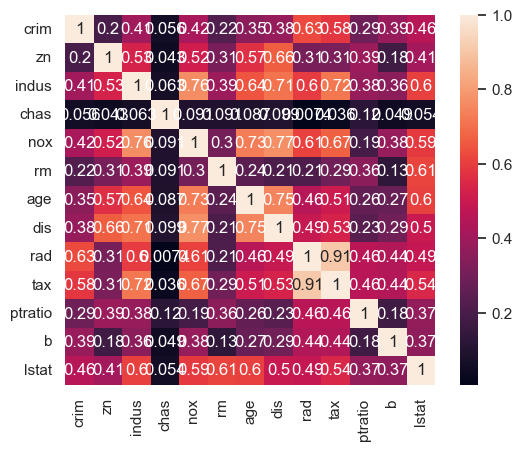

In [38]:
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

# Quickly visualizing the correlation between different features of a dataset using a heatmap.

In [ ]:
sns.scatterplot(x='rm', y='medv', data=df)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes (in $1000s)')
plt.title('Relationship between average number of rooms and median home value')
plt.show()


In [ ]:
sns.histplot(df['crim'], kde=False)
plt.xlabel('Per capita crime rate')
plt.ylabel('Frequency')
plt.title('Distribution of per capita crime rates in Boston')
plt.show()

In [ ]:
sns.boxplot(df['nox'])
plt.xlabel('Nitric oxide concentration (parts per 10 million)')
plt.title('Distribution of nitric oxide concentrations in Boston')
plt.show()

In [ ]:
df.columns

In [19]:
X = df.drop('medv', axis= 1)
y = df['medv']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [21]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

404
102
404
102


In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_train_pred = lr.predict(X_train)

In [25]:
y_pred = lr.predict(X_test)

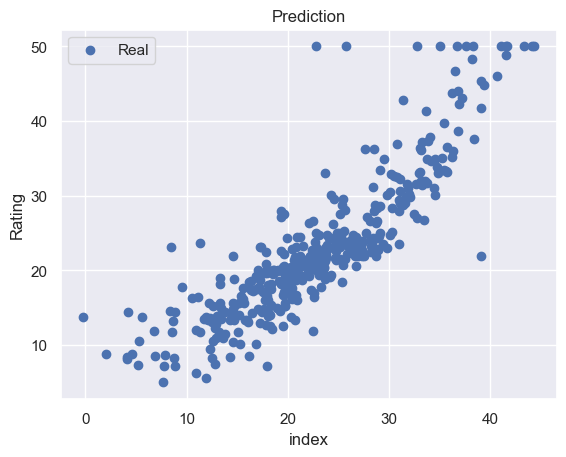

In [26]:
plt.xlabel('index')
plt.ylabel('Rating')
plt.title('Prediction')

plt.scatter(y_train_pred,y_train)

plt.legend(["Real", "Predicted"])

In [27]:
X_range = [i for i in range(len(y_test))]

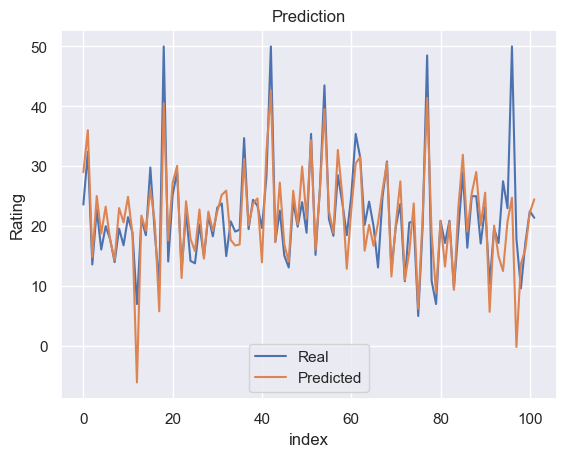

In [28]:
plt.xlabel('index')
plt.ylabel('Rating')
plt.title('Prediction')

plt.plot(X_range,y_test)
plt.plot(X_range,y_pred)
  
plt.legend(["Real", "Predicted"])

# Visually comparing the predicted and actual values of a target variable for a linear regression model, and for assessing how well the model fits the test data. If the two lines are close to each other, it suggests that the model is doing a good job of predicting the target variable.

In [29]:
mean_squared_error(y_test,y_pred)

24.291119474973456

In [30]:
mse = mean_squared_error(y_test,y_pred)

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,y_pred)

0.6687594935356329

In [33]:
rsq = r2_score(y_test,y_pred)

In [37]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 24.291119474973456
r square : 0.6687594935356329


# the MSE and R2 values provide a useful summary of how well a linear regression model fits the data and how much of the variation in the target variable is explained by the predictor variables.

In [35]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 30.246750993923907
Coefficient of the line: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


# The intercept and coefficients of a linear regression model describe a straight line that can be used to predict the value of the target variable based on the values of the predictor variables

The model performance for training set 

RMSE is 5.6371293350711955 
R2 score is 0.6300745149331701   
The model performance for testing set 

RMSE is 5.137400784702911
R2 score is 0.6628996975186952

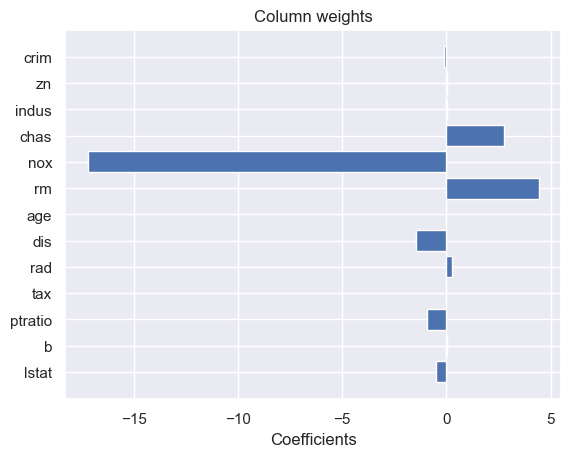

In [36]:
fig, ax = plt.subplots()

ax.barh(list(X_train.columns), list(lr.coef_), align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficients')
ax.set_title('Column weights')

plt.show()

#  Visualizing the relative importance of different predictor variables in a linear regression model. The longer the bar for a given variable, the more it contributes to the predicted outcome.

In [107]:
def predict(a,b,c,d,e,f,g,h,i,j,k,l,m):
    temp=[]
    temp.append(lr.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m]]))
    return temp

In [110]:
predict(0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98)

/Users/ajaykaswan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[array([29.95339638])]

# Making predictions using a trained linear regression model in a convenient and modular way. The function can be called with the 13 predictor variable values as arguments, and it will return a list containing the predicted value(s).